# IMF Python Data API example

The main method used is the CompactData method, which needs 5 parameters:
* Series: the broad group of indicators, for example the International Financial Statistics IFS
* Frequency: monthly, yearly, etc.
* Area: country or region or set of countries
* Indicator: the code for the indicator of interest, for example the IFS has > 2500!!
* Date range: the time limit for the data

The order in which codes are combined is referred to as the dimensions of the data, in the IFS case: {Method}/{Series}/{Frequency}.{Area}.{Indicator}.{Date Range}

Method: CompactData retrieves data, DataStructure retrieves series information, and GenericMetadata returns the metadata;


In [1]:
import requests 
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M.GB.PMP_IX'

data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

In [3]:
import pandas as pd          # pandas version 0.23

baseyr = data['@BASE_YEAR']  # Save the base year

# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')]
             for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
     
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

# Save cleaned dataframe as a csv file
df.to_csv('UK_import_price_index.csv', header=True)

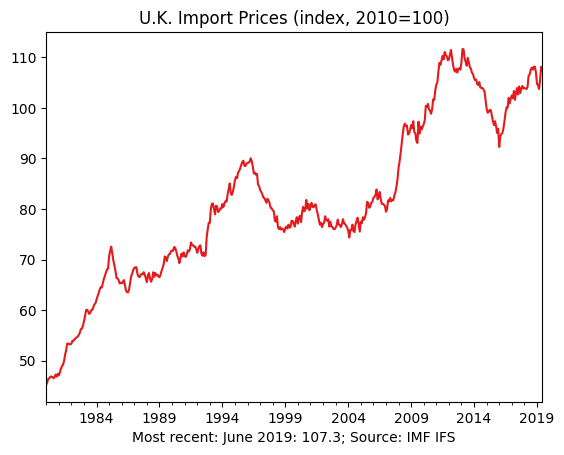

In [5]:
title = f'U.K. Import Prices (index, {baseyr})'
recentdt = df.index[-1].strftime('%B %Y')
recentval = round(df[-1], 1)
recent = f'Most recent: {recentdt}: {recentval}'
source = 'Source: IMF IFS'

# Basic plot
plot = df.plot(title=title, colormap='Set1')
plot = plot.set_xlabel(f'{recent}; {source}')

## DataFlow method to get available series information

In [13]:
import requests

url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/"
key = "Dataflow"

series_list = requests.get(f"{url}{key}").json()['Structure']['Dataflows']['Dataflow']

In [22]:
search_term = "Trade"
for series in series_list:
    if search_term in series['Name']['#text']:
        print(f"{series['Name']['#text']}: {series['KeyFamilyRef']['KeyFamilyID']}")

Direction of Trade Statistics (DOTS), 2020 Q1: DOT_2020Q1
Direction of Trade Statistics (DOTS), 2018 Q3: DOT_2018Q3
Direction of Trade Statistics (DOTS), 2018 Q2: DOT_2018Q2
Direction of Trade Statistics (DOTS), 2019 Q1: DOT_2019Q1
Direction of Trade Statistics (DOTS), 2017 Q2: DOT_2017Q2
Direction of Trade Statistics (DOTS), 2018 Q1: DOT_2018Q1
Direction of Trade Statistics (DOTS), 2019 Q4: DOT_2019Q4
Direction of Trade Statistics (DOTS), 2017 Q4: DOT_2017Q4
Direction of Trade Statistics (DOTS), 2019 Q2: DOT_2019Q2
Direction of Trade Statistics (DOTS), 2020 Q2: DOT_2020Q2
Direction of Trade Statistics (DOTS), 2018 Q4: DOT_2018Q4
Direction of Trade Statistics (DOTS), 2019 Q3: DOT_2019Q3
Direction of Trade Statistics (DOTS), 2017 Q3: DOT_2017Q3
Direction of Trade Statistics (DOTS), 2017 Q1: DOT_2017Q1
Direction of Trade Statistics (DOTS), 2020 Q4: DOT_2020Q4
Direction of Trade Statistics (DOTS), 2020 Q3: DOT_2020Q3
Direction of Trade Statistics (DOTS), 2021 Q1: DOT_2021Q1
Commodity Term

In [23]:
len(series_list)

259

## DataStructure to get dimensions of the series
The key in the API request is defined by the structure of the series|

In [19]:
key = 'DataStructure/DOT'  # Method / series
dimension_list = requests.get(f'{url}{key}').json()\
            ['Structure']['KeyFamilies']['KeyFamily']\
            ['Components']['Dimension']
for n, dimension in enumerate(dimension_list):
    print(f'Dimension {n+1}: {dimension["@codelist"]}')

Dimension 1: CL_FREQ
Dimension 2: CL_AREA_DOT
Dimension 3: CL_INDICATOR_DOT
Dimension 4: CL_COUNTERPART_AREA_DOT


In [24]:
key = f"CodeList/{dimension_list[2]['@codelist']}"
code_list = requests.get(f'{url}{key}').json()\
	    ['Structure']['CodeLists']['CodeList']['Code']
for code in code_list:
    print(f"{code['Description']['#text']}: {code['@value']}")

Goods, Value of Exports, Free on board (FOB), US Dollars: TXG_FOB_USD
Goods, Value of Imports, Cost, Insurance, Freight (CIF), US Dollars: TMG_CIF_USD
Goods, Value of Imports, Free on board (FOB), US Dollars: TMG_FOB_USD
Goods, Value of Trade Balance, US Dollars: TBG_USD
